In [97]:
#!pip install arch
#!pip install numdifftools
import arch
from google.colab import drive
import os
#Mount Google Drive
#drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Volatility-models')
print(os.getcwd())

/content/drive/My Drive/LEARN/Finance/quantitative finance/Volatility-models


# **DATA**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101094 entries, 2011-01-03 09:30:00 to 2011-12-30 16:15:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Close   101094 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB
                       Close
Date                        
2011-01-03 09:30:00  126.710
2011-01-03 09:31:00  126.720
2011-01-03 09:32:00  126.785
2011-01-03 09:33:00  126.750
2011-01-03 09:34:00  126.740


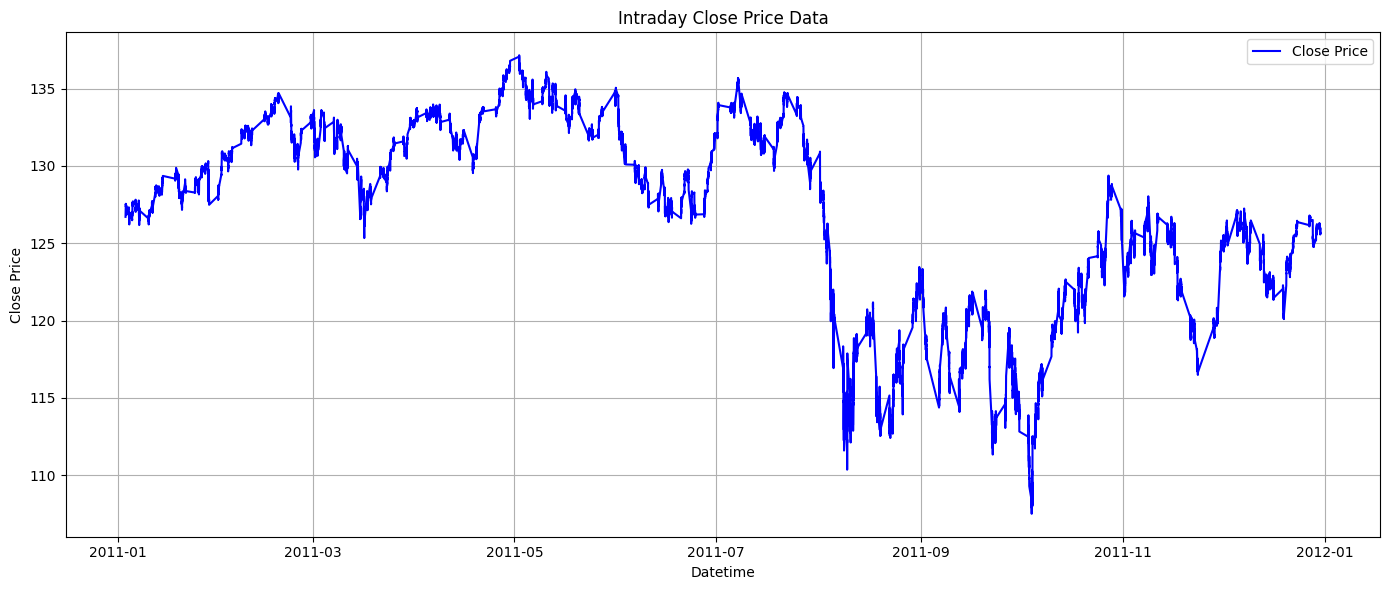

                 Close        High         Low        Open    Volume
Price                                                               
2024-09-18  554.493774  561.694072  553.930779  556.804954  59044900
2024-09-19  563.955872  565.832522  561.091583  563.985531  75315500
2024-09-20  562.981018  564.031187  559.929560  562.574846  77503100
2024-09-23  564.387756  565.041670  562.832307  564.060860  44116900
2024-09-24  566.002686  566.062127  562.336981  565.190282  46805700
                 Close        High         Low        Open     Volume
Price                                                                
2025-09-11  657.630005  658.330017  653.590027  654.179993   69934400
2025-09-12  657.409973  659.109985  656.900024  657.599976   72780100
2025-09-15  660.909973  661.039978  659.340027  659.640015   63772400
2025-09-16  660.000000  661.780029  659.210022  661.469971   61169000
2025-09-17  659.179993  661.719971  654.299988  660.010010  101648200
<class 'pandas.core.frame.D

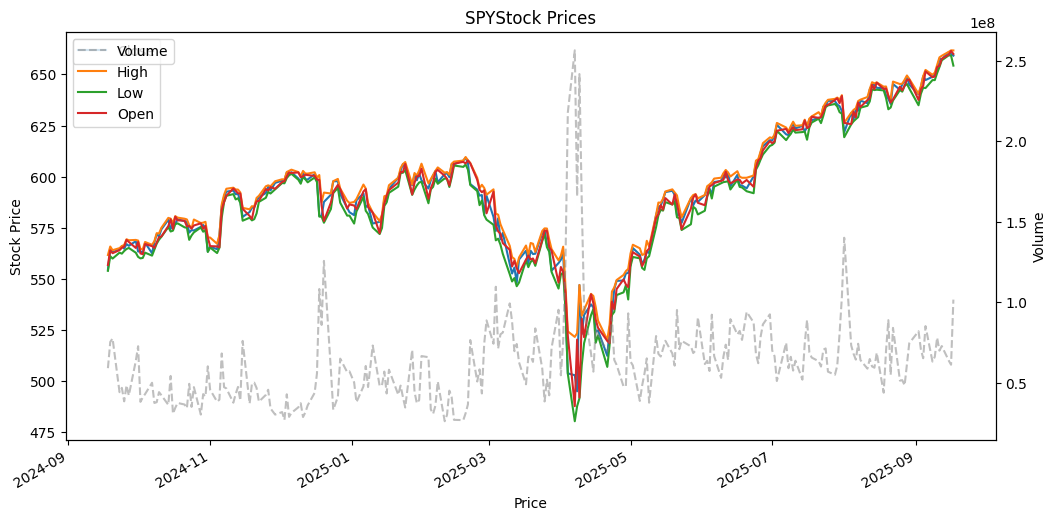

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-18 to 2025-09-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7654 entries, 0 to 7653
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     7654 non-null   object        
 1   lastTradeDate      7654 non-null   object        
 2   strike             7654 non-null   float64       
 3   lastPrice          7654 non-null   float64       
 4   bid                7654 non-null   float64       
 5   ask                7654 non-null   float64       
 6   change             7654 non-null   float64       
 7   percentChange      7654 non-null   float64       
 8   volume             7282 non-null   float64       
 9   openInter

In [98]:
%run time_series.ipynb
%run stochastic.ipynb
%run implied.ipynb
%run ML.ipynb
%run stock_option_data.ipynb
%run volatility_forecasting.ipynb

predictor = StockPredictor('SPY', '2000-01-01', date.today(), 'Close', nfuture = 21) #nfuture manages the the period of forecasting in days
predictor.data_initiation_HFD()
predictor.data_initiation()

# **VOLATILITY : STOCHASTIC**



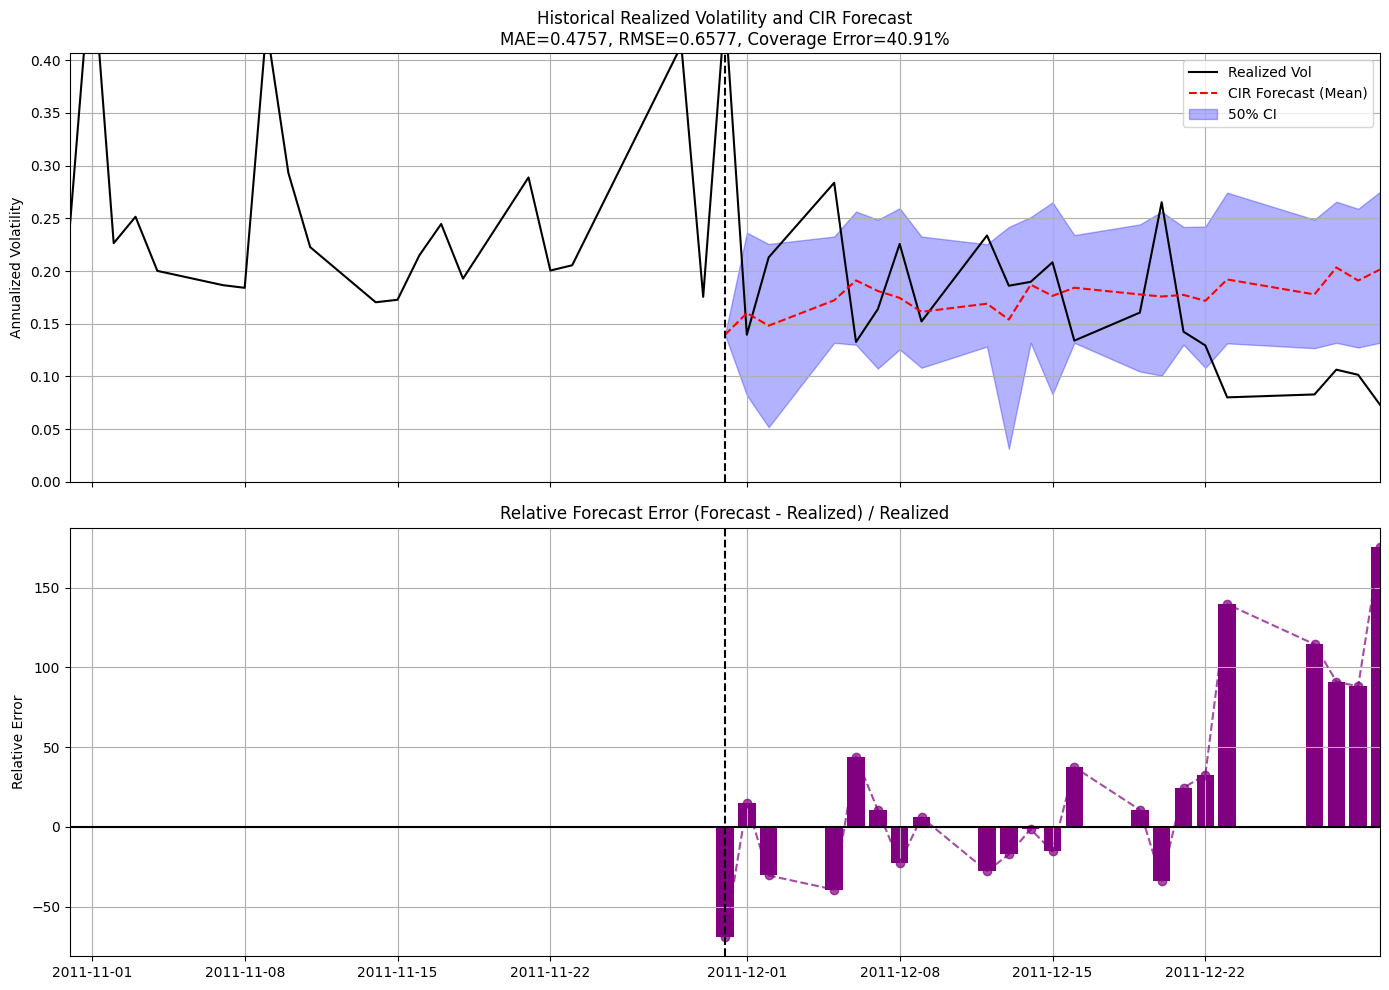

In [99]:
nsim = 100
alpha = 0.5

predictor.run_stochastic(nsim, alpha, model_type = 'CIR')

# Options available - CIR

# **VOLATILITY : TIME SERIES**

CHECK STATIONARITY ----------------


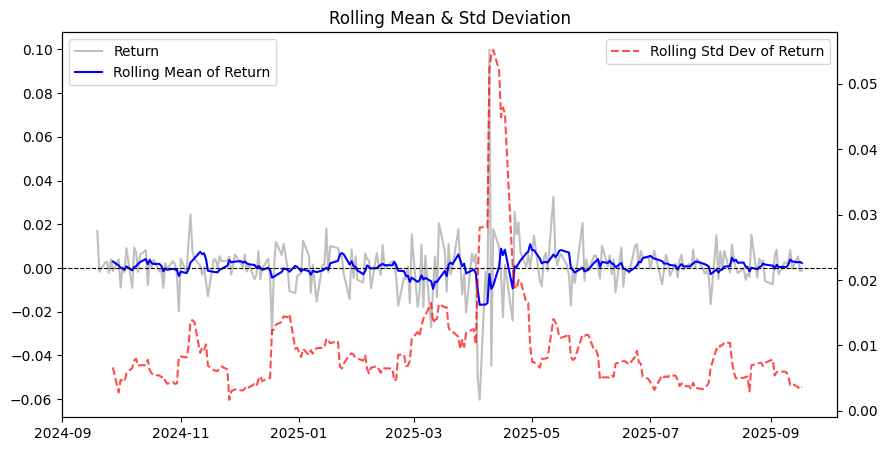

ADF Test
ADF Statistic: -10.0028, p-value: 0.0000
Stationary
KPSS Test
KPSS Statistic: 0.1272, p-value: 0.1000
Stationary
DONE : CHECK STATIONARITY ----------------


/tmp/ipython-input-2195157039.py:39: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




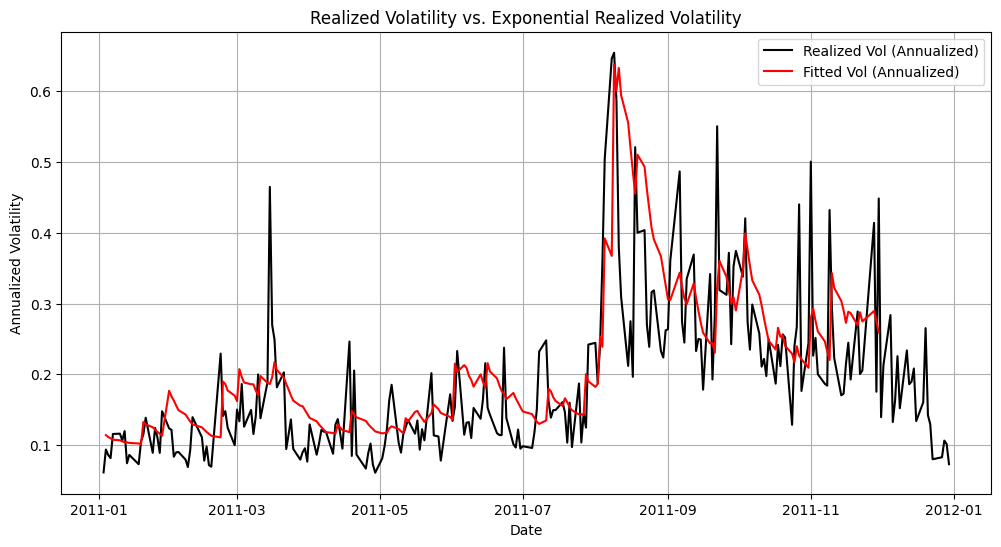

MAE: 0.7863, RMSE: 1.0371


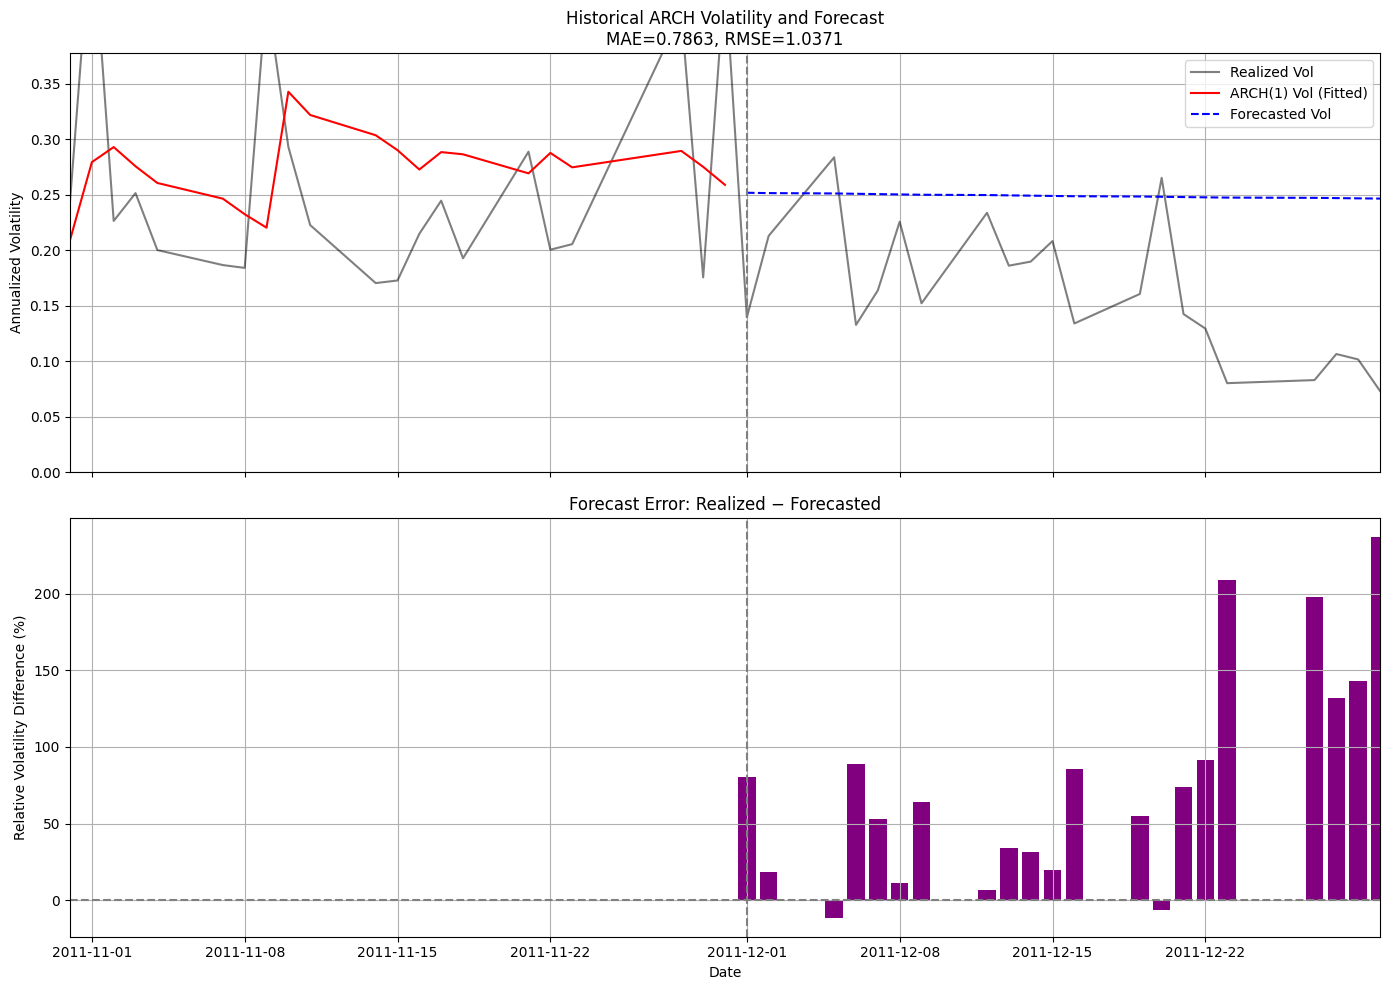

----- PARAMETER UNCERTAINTY----


/tmp/ipython-input-1863748451.py:137: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1863748451.py:139: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1863748451.py:166: RuntimeWarning:

covariance is not symmetric positive-semidefinite.



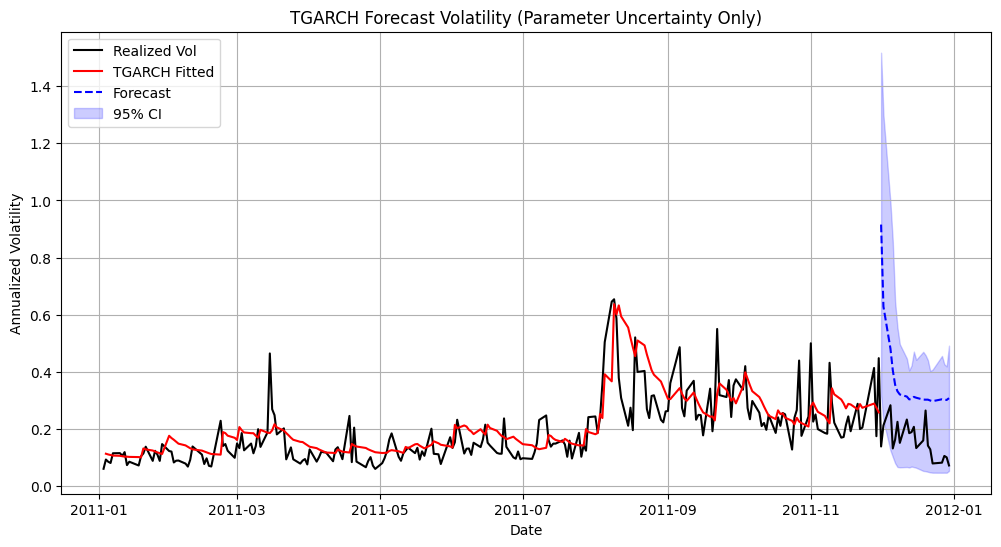

In [100]:
n_ar = 1
n_ma = 1
n_S = 1
n_smooth = 21

predictor.run_ts(ar_order=n_ar,  ma_order = n_ma, sym_order=n_S, ema_smooth = n_smooth, nsim = 100, alpha = 0.05, model_type='TGARCH')

##Options available - EWMA, ARCH, GARCH, TGARCH

#REALIZED VOLATILITY calculate here uses high frequency data

# **VOLATILITY : IMPLIED (BSM) --> LOCAL/DETERMINISTIC**

---



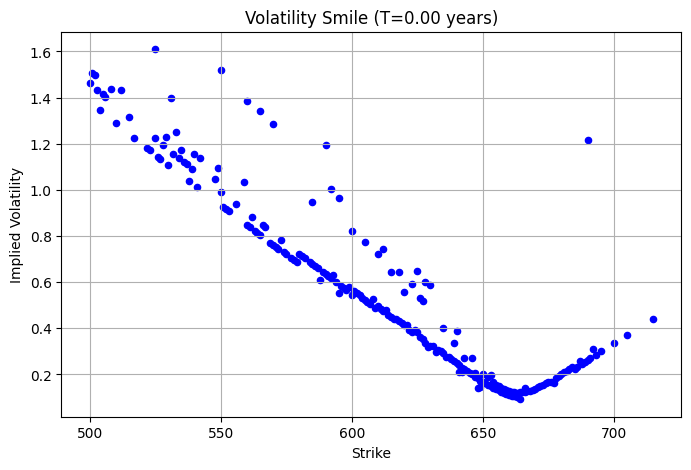

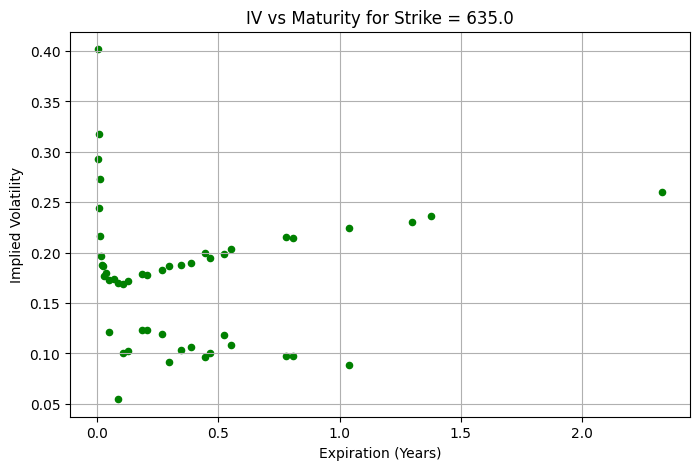

In [101]:
predictor.run_implied(model_type = 'dupire')

#Options avaailable : dupire, time(WIP)

# **VOLATILITY : ML - WIP**

In [103]:
predictor.run_ml(model_type = 'NN')
#options available :  'NN'